# Data Science Regression Project: Melanoma Tumor Size Prediction

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
import seaborn as sns
from outlier_plotting.sns import handle_outliers

In [2]:
data_train = pd.read_csv(r'E:/Data_Sets/Train_15.csv')
test  = pd.read_csv(r'E:/Data_Sets/Test_15.csv')

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       9146 non-null   float64
 1   size_npear      9146 non-null   float64
 2   malign_ratio    9146 non-null   float64
 3   damage_size     9146 non-null   float64
 4   exposed_area    9146 non-null   float64
 5   std_dev_malign  9146 non-null   float64
 6   err_malign      9146 non-null   float64
 7   malign_penalty  9146 non-null   int64  
 8   damage_ratio    9146 non-null   float64
 9   tumor_size      9146 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 714.7 KB


In [3]:
data_train.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


In [4]:
train_x = data_train[['mass_npea','size_npear','malign_ratio','damage_size','exposed_area','std_dev_malign','err_malign','malign_penalty','damage_ratio']]
train_y = data_train[['tumor_size']]

# Data Preprocessing

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [6]:
scaler_x.fit(train_x)
X_train = scaler_x.transform(train_x)
X_train

array([[0.1191346 , 0.18492038, 0.74629702, ..., 0.01836822, 0.21176471,
        0.77060131],
       [0.37417816, 0.33543246, 0.48051062, ..., 0.05350532, 0.70588235,
        0.21703855],
       [0.22007908, 0.16149218, 0.33397486, ..., 0.03901303, 0.21470588,
        0.47155346],
       ...,
       [0.15298102, 0.08531019, 0.20882869, ..., 0.02987848, 0.03823529,
        0.60813771],
       [0.33852691, 0.45016649, 0.79713993, ..., 0.20675121, 0.11470588,
        0.61818292],
       [0.11684076, 0.08246861, 0.28361918, ..., 0.02183102, 0.08235294,
        0.72372471]])

In [7]:
df_train_x = pd.DataFrame(X_train, columns=train_x.columns)
df_train_x.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio
0,0.119135,0.184920,0.746297,0.123530,0.130910,0.155994,0.018368,0.211765,0.770601
1,0.374178,0.335432,0.480511,0.634435,0.363899,0.436510,0.053505,0.705882,0.217039
2,0.220079,0.161492,0.333975,0.348180,0.228028,0.257834,0.039013,0.214706,0.471553
3,0.299703,0.307078,0.559394,0.431793,0.310263,0.283838,0.046039,0.094118,0.412135
4,0.137133,0.182106,0.650921,0.222587,0.142910,0.186033,0.023920,0.167647,0.631961


In [8]:
scaler_y.fit(train_y)
Y = scaler_y.transform(train_y)
Y_Train = pd.DataFrame(Y, columns=['tumor_size'])
Y.flatten()

array([0.67160341, 0.12610124, 0.08038478, ..., 0.09386161, 0.84523073,
       0.67160341])

In [9]:
train = pd.concat([df_train_x, Y_Train], axis=1)
train.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,0.119135,0.184920,0.746297,0.123530,0.130910,0.155994,0.018368,0.211765,0.770601,0.671603
1,0.374178,0.335432,0.480511,0.634435,0.363899,0.436510,0.053505,0.705882,0.217039,0.126101
2,0.220079,0.161492,0.333975,0.348180,0.228028,0.257834,0.039013,0.214706,0.471553,0.080385
3,0.299703,0.307078,0.559394,0.431793,0.310263,0.283838,0.046039,0.094118,0.412135,0.180771
4,0.137133,0.182106,0.650921,0.222587,0.142910,0.186033,0.023920,0.167647,0.631961,0.858279


In [10]:
scaler_x.fit(test)
df_test = scaler_x.transform(test)
df_test = pd.DataFrame(df_test, columns=test.columns)
data = pd.concat([train, df_test], axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45730 entries, 0 to 36583
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       45730 non-null  float64
 1   size_npear      45730 non-null  float64
 2   malign_ratio    45730 non-null  float64
 3   damage_size     45730 non-null  float64
 4   exposed_area    45730 non-null  float64
 5   std_dev_malign  45730 non-null  float64
 6   err_malign      45730 non-null  float64
 7   malign_penalty  45730 non-null  float64
 8   damage_ratio    45730 non-null  float64
 9   tumor_size      9146 non-null   float64
dtypes: float64(10)
memory usage: 3.8 MB


In [37]:
scaler_x.fit(test)
test = scaler_x.transform(test)
test[:2]

array([[0.06785857, 0.03424624, 0.19021414, 0.12132318, 0.06663616,
        0.06045025, 0.02172534, 0.06285714, 0.66626739],
       [0.08558863, 0.08220948, 0.40744863, 0.11293674, 0.09019602,
        0.08369536, 0.0305338 , 0.13714286, 0.63589873]])

# Exploratory Data Analysis

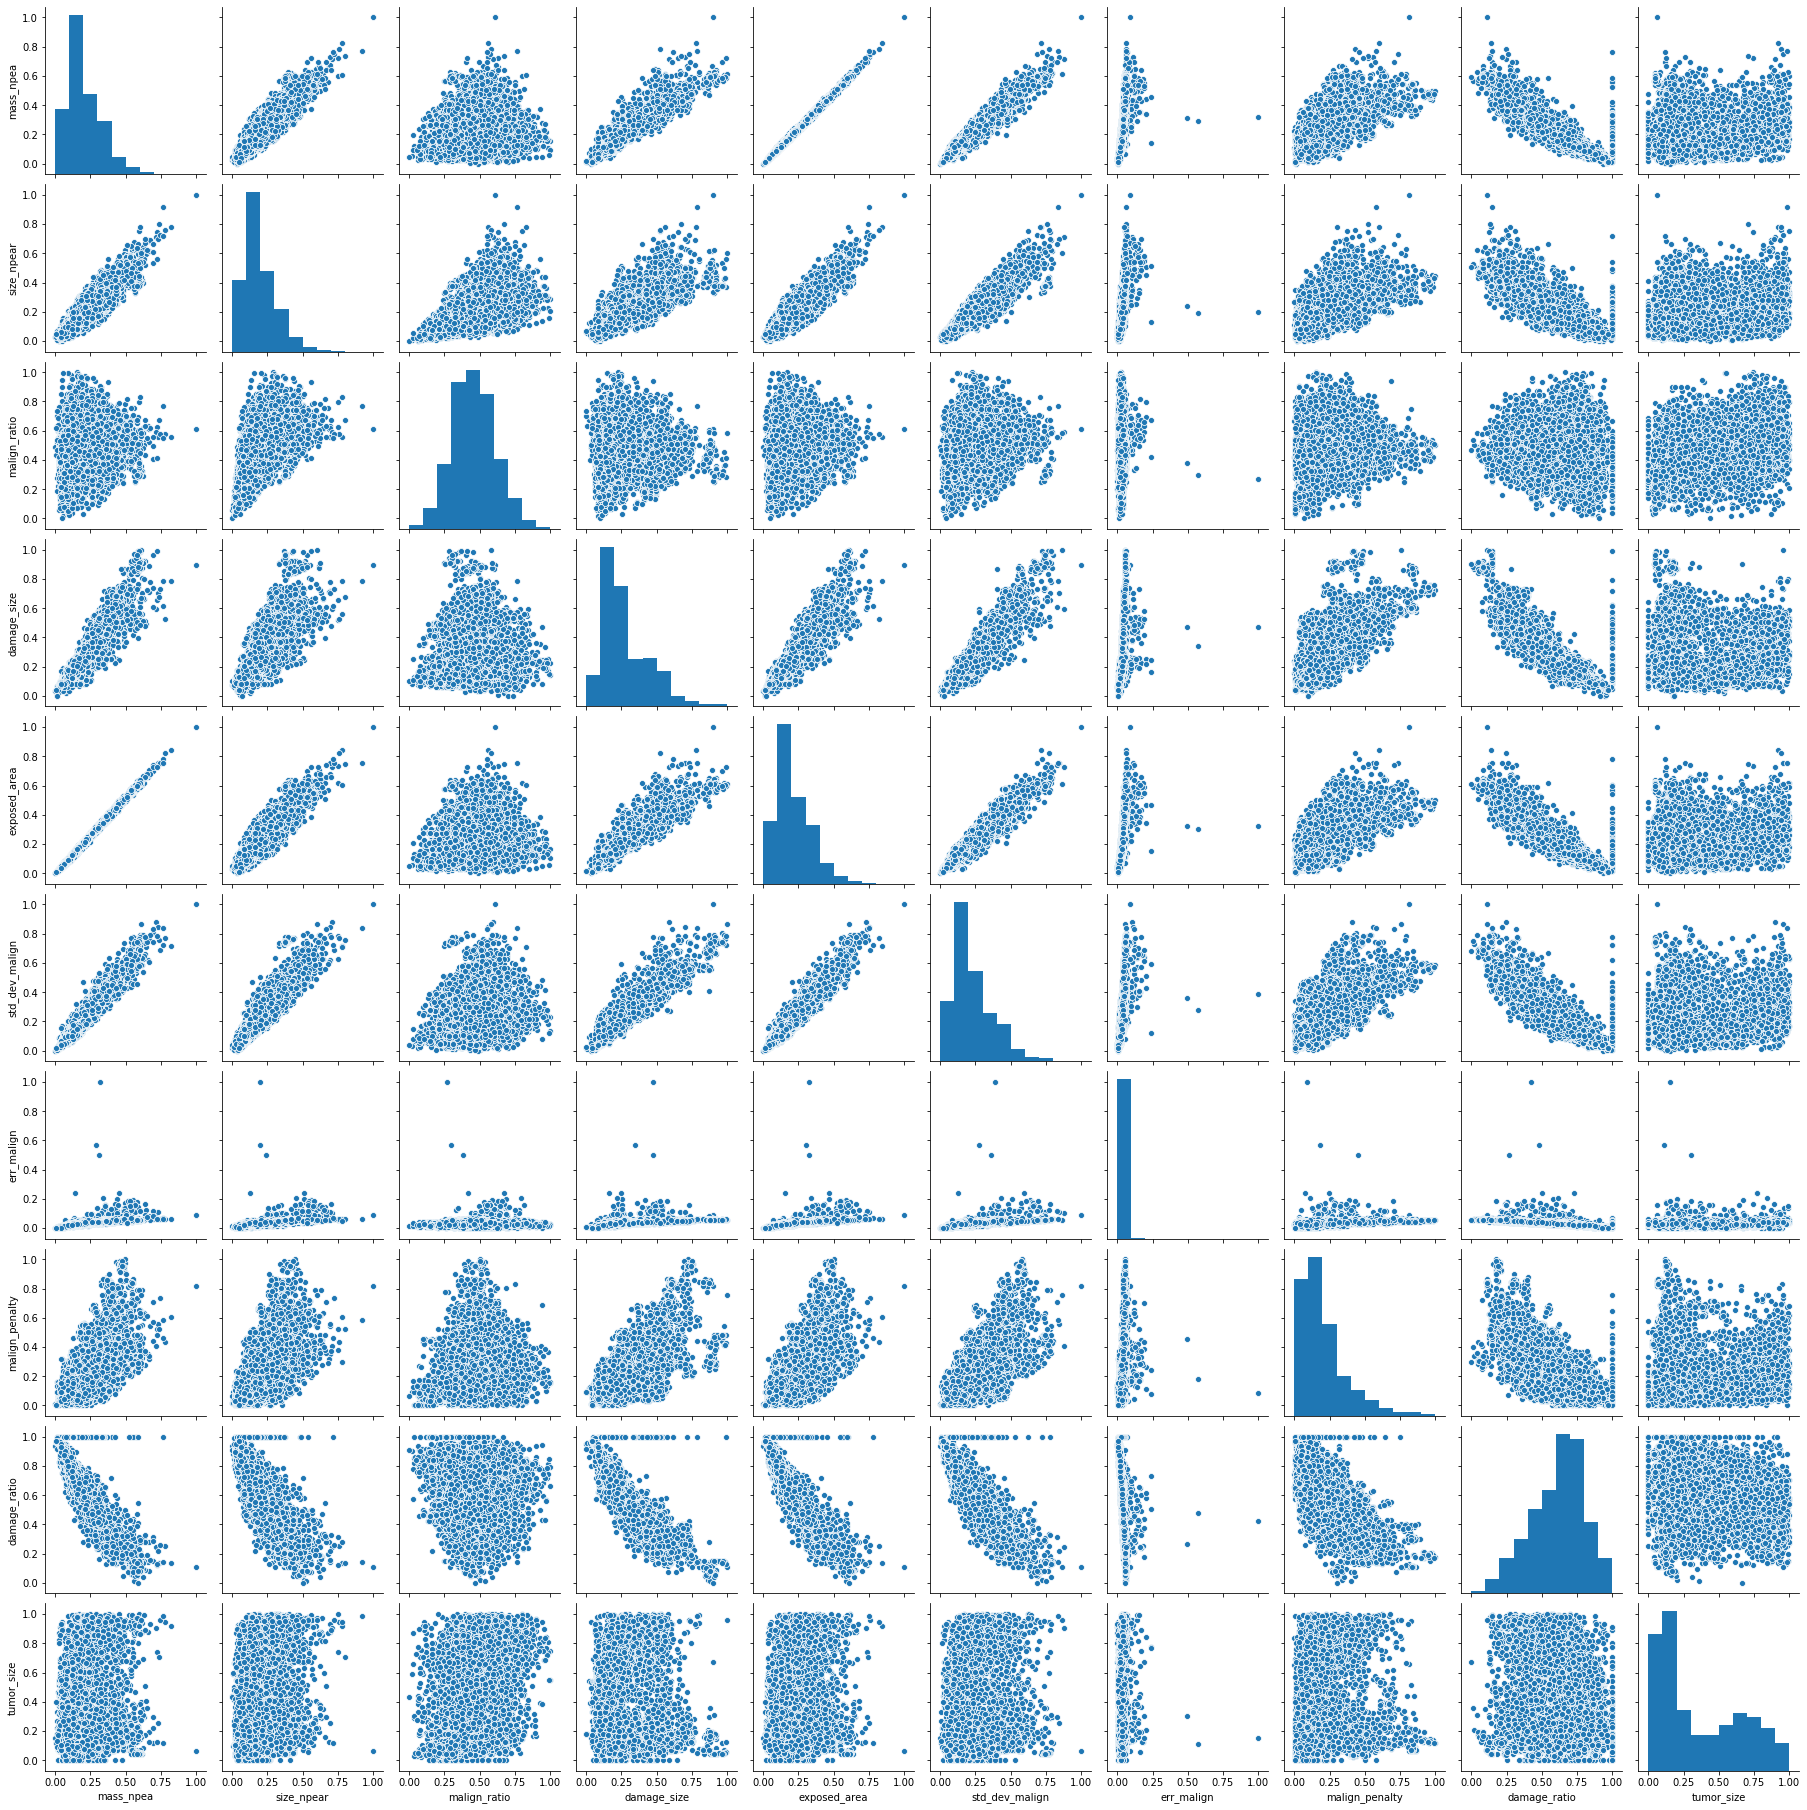

In [11]:
sns.pairplot(train)

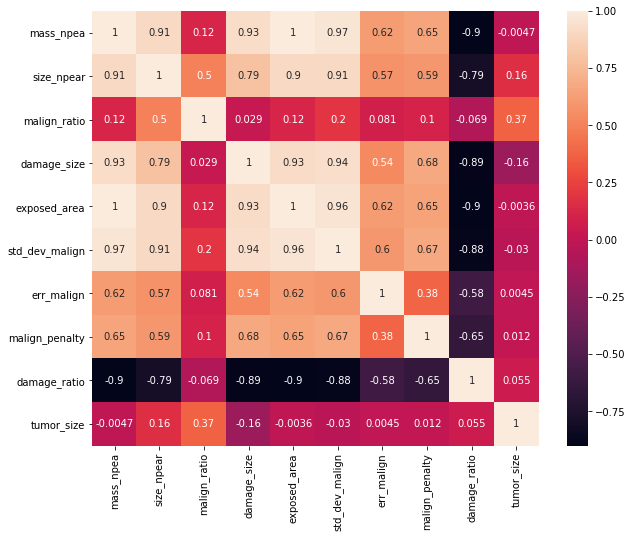

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), annot=True)

# Checking for Outliers in the Dataset

#### Since i will use the algorithms which are not sensitive to the outliers like eg: ensembling techniques, logistics regression, svm etc i don't have to worry about the outlier present in general in the data set
#### Regarding the outlier with respect to the domain i don't have any proper knowledge about it and also it was not discussed by the domain expert as well so i am assuming data set to be perfect and fine

## Pycaret

### PyCaret is an open source low-code machine learning library in Python that aims to reduce the hypothesis to insights cycle time in a ML experiment. It enables data scientists to perform end-to-end experiments quickly and efficiently. In comparison with the other open source machine learning libraries, PyCaret is an alternate low-code library that can be used to perform complex machine learning tasks with only few lines of code. PyCaret is simple and easy to use. All the operations performed in PyCaret are automatically stored in a custom Pipeline that is fully orchestrated for deployment. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks such as scikit-learn, XGBoost, Microsoft LightGBM, spaCy and many more. 

In [13]:
!pip install pycaret

In [14]:
from pycaret.regression import * 

### Creating a setup

In [15]:
exp_reg = setup(train, target = 'tumor_size')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,651
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(9146, 10)"
4,Missing Values,False
5,Numeric Features,9
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Compairing different ML models for a given problem or dataset to get the best suitable model along with all the performance metrics

In [16]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extra Trees Regressor,0.1401,0.0373,0.1930,0.5586,0.1332,0.6304,1.5525
1,CatBoost Regressor,0.1491,0.0396,0.1990,0.5304,0.1386,0.7091,11.5462
2,Random Forest,0.1455,0.0400,0.1998,0.5268,0.1384,0.6731,3.1585
3,Light Gradient Boosting Machine,0.1533,0.0420,0.2048,0.5022,0.1425,0.7400,0.4351
4,Extreme Gradient Boosting,0.1533,0.0443,0.2102,0.4756,0.1463,0.7209,1.2639
5,K Neighbors Regressor,0.1463,0.0468,0.2161,0.4468,0.1489,0.5441,0.0374
6,Gradient Boosting Regressor,0.1826,0.0521,0.2281,0.3834,0.1603,0.9852,2.4052
7,Support Vector Machine,0.1783,0.0535,0.2312,0.3662,0.1621,0.9043,1.7803
8,Bayesian Ridge,0.2054,0.0604,0.2458,0.2843,0.1738,1.1818,0.0247
9,Linear Regression,0.2051,0.0604,0.2458,0.2841,0.1738,1.1790,0.0125


### Now as we come to know the best model for our problem now checking  its performance by plotting Learning Curve 

In [23]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor()

In [16]:
train_sizes, train_scores, valid_scores = learning_curve(
ExtraTreesRegressor() , X_train, Y.flatten(), train_sizes=np.linspace(0.01, 1.0, 10), scoring='neg_root_mean_squared_error', cv=10)

In [17]:
valid_scores

array([[-0.26439734, -0.25090992, -0.25226719, -0.26141145, -0.24696267,
        -0.25372555, -0.26037959, -0.25471128, -0.23888308, -0.26215107],
       [-0.2061498 , -0.21374024, -0.21144765, -0.22168236, -0.22151077,
        -0.22677939, -0.222685  , -0.22829467, -0.21248212, -0.22007113],
       [-0.19863185, -0.20446277, -0.20116507, -0.20644207, -0.20864324,
        -0.21634574, -0.21260569, -0.21505458, -0.20447836, -0.20959663],
       [-0.19132512, -0.19889858, -0.1955445 , -0.19814031, -0.19923199,
        -0.21166398, -0.20700136, -0.20518316, -0.19956485, -0.20232264],
       [-0.18622746, -0.19399559, -0.18803723, -0.19448037, -0.19483001,
        -0.20949311, -0.20470393, -0.20026197, -0.19954256, -0.19946824],
       [-0.18093499, -0.19109201, -0.18777789, -0.1909356 , -0.19353531,
        -0.20621553, -0.20185669, -0.19590349, -0.19385201, -0.19695516],
       [-0.18334582, -0.18714754, -0.18156334, -0.18731396, -0.19241638,
        -0.20428753, -0.19779641, -0.19251025

In [18]:
train_scores_mean = -train_scores.mean(axis = 1)
valid_scores_mean = -valid_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean valid scores\n\n',pd.Series(valid_scores_mean, index = train_sizes))

Mean training scores

 82      6.064963e-16
987     5.853113e-16
1893    5.972818e-16
2798    6.040824e-16
3703    1.469177e-04
4609    2.316142e-03
5514    3.912543e-03
6420    3.628036e-03
7325    3.396529e-03
8231    3.204150e-03
dtype: float64

 --------------------

Mean valid scores

 82      0.254580
987     0.218484
1893    0.207743
2798    0.200888
3703    0.197104
4609    0.193906
5514    0.191068
6420    0.189465
7325    0.186614
8231    0.184844
dtype: float64


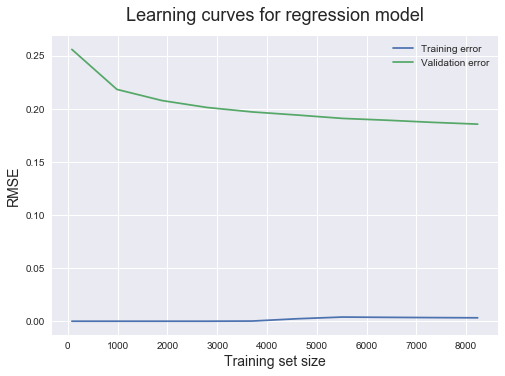

In [77]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, valid_scores_mean, label = 'Validation error')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for regression model', fontsize = 18, y = 1.03)
plt.legend()

### From the above plot its clearly indicative that my model is somewhat overfitting this might be because of two reasons first lack of data in which case i need more data so that my model can learn and generalize properly or second because of default parameters in which case i need to do the hyperparameter tuning


### As i have limited dataset so i have to perform the hyperprameter tuning

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()

In [18]:
n_estimators =[250,300,350,400]
max_depth = [2, 4, 6, 8, None]
min_samples_leaf = [1,2,3,4]
print(max_depth)
param_distribution=dict(max_depth=max_depth,n_estimators=n_estimators,min_samples_leaf=min_samples_leaf)
grid_search = GridSearchCV(model, param_distribution, scoring="neg_root_mean_squared_error", n_jobs=-1, cv=10)
grid_result = grid_search.fit(X_train, Y.flatten())
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

[2, 4, 6, 8, None]
Best: -0.184141 using {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 300}
-0.268572 (0.001873) with: {'max_depth': 2, 'min_samples_leaf': 1, 'n_estimators': 250}
-0.268692 (0.001770) with: {'max_depth': 2, 'min_samples_leaf': 1, 'n_estimators': 300}
-0.268702 (0.001842) with: {'max_depth': 2, 'min_samples_leaf': 1, 'n_estimators': 350}
-0.268684 (0.001745) with: {'max_depth': 2, 'min_samples_leaf': 1, 'n_estimators': 400}
-0.268648 (0.001831) with: {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 250}
-0.268683 (0.001891) with: {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 300}
-0.268648 (0.001686) with: {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 350}
-0.268670 (0.001739) with: {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 400}
-0.268693 (0.001939) with: {'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 250}
-0.268411 (0.001615) with: {'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 300}
-0.268674 (0.00

### From the above output its clear that between 250<n_estimators <350 the error decreases in the training so now tunning the model to check how low the error can be achieved

In [21]:
n_estimators =[370,372,374,376]
max_depth = [None]
min_samples_leaf = [1]
param_distribution=dict(max_depth=max_depth,n_estimators=n_estimators,min_samples_leaf=min_samples_leaf)
grid_search = GridSearchCV(model, param_distribution, scoring="neg_root_mean_squared_error", n_jobs=-1, cv=10)
grid_result = grid_search.fit(X_train, Y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\AAA\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best: -0.184071 using {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 374}
-0.184224 (0.007156) with: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 370}
-0.184127 (0.007449) with: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 372}
-0.184071 (0.007110) with: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 374}
-0.184138 (0.007061) with: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 376}


### So the minimum error (RMSE) that can be achieved is 0.184071

In [26]:
train_sizes, train_scores, valid_scores = learning_curve(
ExtraTreesRegressor(n_estimators=374, max_depth=None) , X_train, Y.flatten(), train_sizes=np.linspace(0.01, 1.0, 10), scoring='neg_root_mean_squared_error', cv=10)

In [28]:
train_scores_mean = -train_scores.mean(axis = 1)
valid_scores_mean = -valid_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean valid scores\n\n',pd.Series(valid_scores_mean, index = train_sizes))

Mean training scores

 82      2.414434e-15
987     2.265152e-15
1893    2.225403e-15
2798    2.255827e-15
3703    1.469177e-04
4609    2.316142e-03
5514    3.912543e-03
6420    3.628036e-03
7325    3.396529e-03
8231    3.204150e-03
dtype: float64

 --------------------

Mean valid scores

 82      0.254733
987     0.217462
1893    0.206932
2798    0.200136
3703    0.196213
4609    0.193099
5514    0.190508
6420    0.188458
7325    0.186332
8231    0.184111
dtype: float64


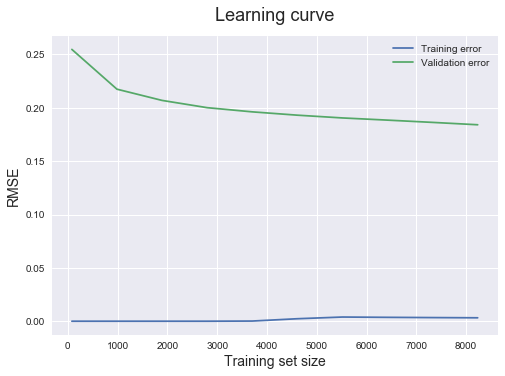

In [29]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, valid_scores_mean, label = 'Validation error')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curve', fontsize = 18, y = 1.03)
plt.legend()

## Model Preparation

In [32]:
reg = ExtraTreesRegressor(n_estimators=374, max_depth=None)

In [34]:
reg.fit(X_train, Y.flatten())

ExtraTreesRegressor(n_estimators=374)

In [38]:
y_pred = reg.predict(test)
y_pred[:5]

array([0.27782021, 0.48920702, 0.17443701, 0.44709985, 0.6614127 ])

In [39]:
scale = MinMaxScaler()
scale.min_, scale.scale_ = scaler_y.min_[0], scaler_y.scale_[0]

In [45]:
Y_pred = scale.inverse_transform(y_pred.reshape(1,36584))
prediction = Y_pred.T
df = pd.DataFrame(prediction, columns =['tumor_size'])
df.head()

,tumor_size
0,5.833947
1,10.272858
2,3.663003
3,9.388650
4,13.889005
